In [7]:
import scipy as sp
import scipy.signal
%matplotlib inline
from matplotlib import pyplot as plt
def graficar_carga(archivo):
    plt.figure()
    datos = sp.loadtxt(archivo)
    datos[:,0] -= datos[0,0]
    plt.plot(datos[:,0], datos[:,1], 'b')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Viny (V)', color='b')
    plt.gca().tick_params(axis='y', colors='b')
    ax = plt.gca().twinx()
    ax.plot(datos[:,0], datos[:,2]*1e6, 'r')
    ax.set_ylabel('Id (uA)', color='r')
    ax.tick_params(axis='y', colors='r')
def graficar_iv(archivo):
    plt.figure()
    datos = sp.loadtxt(archivo)
    plt.plot(datos[:,0], datos[:,1] * 1e3, '.')
    plt.xlabel('Vsd (V)')
    plt.ylabel('Id (mA)')
    plt.grid()
def graficar_vi(archivo, titulo=''):
    plt.figure()
    datos = sp.loadtxt(archivo)
    plt.semilogy(datos[:,1], abs(datos[:,0]), '.')
    plt.xlabel('Tensión (V)')
    plt.ylabel('Corriente (A)')
    plt.title(titulo)
    plt.grid()
def graficar_ivs(archivos):
    plt.figure()
    for ii, archivo in enumerate(archivos):
        datos = sp.loadtxt(archivo)
        plt.plot(datos[:,0], datos[:,1] * 1e3, '.', label=str(ii+1))
        print("{:02d}\t{}".format(ii + 1, archivo))
    plt.legend()
    plt.xlabel('Vsd (V)')
    plt.ylabel('Id (mA)')
    plt.grid()
def graficar_cargas(primera, ultima, descripcion='_'):
    plt.figure()
    t0 = None
    ax = None
    for ii in range(primera, ultima):
        carga = None
        try:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}.txt'.format(descripcion, ii))
        except FileNotFoundError:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}.txt'.format(ii))
        if t0 is None:
            t0 = carga[0, 0]
        line, = plt.plot((carga[:,0]-t0)/60, carga[:, 2] * 1e6)
        plt.text((carga[-1,0]-t0)/60, carga[-1, 2] * 1e6, str(ii), color=line.get_color())
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Corriente (uA)')
    ax = plt.gca().twinx()
    for ii in range(primera, ultima):
        try:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}.txt'.format(descripcion, ii))
        except FileNotFoundError:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}.txt'.format(ii))
        ax.plot((carga[:,0]-t0)/60, carga[:, 1], '--')
    ax.set_ylabel('Inyector (V)')
    plt.grid()
def graficar_varias(primera, ultima, descripcion='_'):
    graficar_cargas(primera, ultima, descripcion)
    plt.figure()
    t0 = None
    for ii in range(primera, ultima):
        carga = None
        try:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}.txt'.format(descripcion, ii))
        except FileNotFoundError:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}.txt'.format( ii))
        if t0 is None:
            t0 = carga[0, 0]
        line, = plt.plot((carga[:,0]-t0)/60, carga[:, 1])
        plt.text((carga[-1,0]-t0)/60, carga[-1, 1], str(ii), color=line.get_color())
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Inyector (V)')
    plt.grid()
    plt.figure()
    for ii in range(primera, ultima):
        id = None
        try:
            iv = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}_iv.txt'.format(descripcion, ii))
        except FileNotFoundError:
            iv = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}_iv.txt'.format(ii))
        line, = plt.plot(iv[:,0], iv[:,1] * 1e3, label=str(ii))
        xx = 2 +  .3 * (ii - primera)
        yy = sp.interp(xx, iv[:,0], iv[:,1] * 1e3)
        plt.text(xx, yy, str(ii), color=line.get_color())
    plt.xlabel('Vsd (V)')
    plt.ylabel('Id (mA)')
    plt.grid()
    plt.figure()
    for ii in range(primera, ultima):
        iv = None
        try:
            iv = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}_iv.txt'.format(descripcion, ii))
        except FileNotFoundError:
            iv = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}_iv.txt'.format(ii))
        line, = plt.semilogy(ii, iv[-1,1] * 1e3, 'x', label=str(ii))
    plt.xlabel('Curva')
    plt.ylabel('Id (mA)')
    plt.grid()

<img src="files/figuras/fg/pinoutfg.png">

Podría usar un tubo UV para descargar el FG:

* [Preguntar precio por menor potencia](http://articulo.mercadolibre.com.ar/MLA-580620639-tubos-15w-philips-germicida-uv-2535nm-mata-bacterias--_JM)

* [$190](http://articulo.mercadolibre.com.ar/MLA-583605273-tubo-germicida-uv-15-w-marca-bte-_JM)

* [$390](http://articulo.mercadolibre.com.ar/MLA-580620647-tubo-germicida-de-9w-tuv-2-pin-_JM)

Dice Adrián que mida IV del inyector para elegir una tensión de inyección segura.

14 de Octubre
==

IV del lector sin haber inyectado. Me limita la corriente de la fuente del 617.

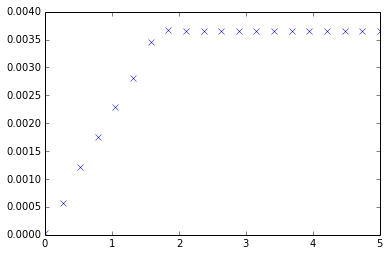

In [7]:
datos = sp.loadtxt('../lantz/mediciones/fg/defabrica2.txt')
plt.plot(datos[:,0], datos[:,1], 'x')

Puse un LM324 seguidor a la salida de la fuente del 617

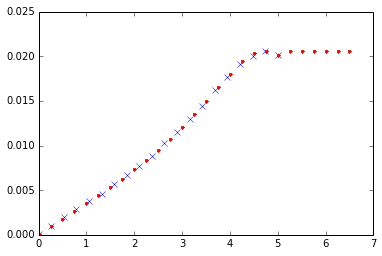

In [13]:
datos = sp.loadtxt('../lantz/mediciones/fg/defabrica3.txt')
plt.plot(datos[:,0], datos[:,1], 'x')
datos = sp.loadtxt('../lantz/mediciones/fg/defabrica7.txt')
plt.plot(datos[:,0], datos[:,1], '.')

Satura en ~5V. Las especificaciones del proceso dicen Vgs máx = 5.5V y Absolute Maximum 7V. Tengo que descargar el floating.

El GLOMAE nos prestó una lampara UV que debería descargarlo.

Me olvidé de desconectar las resistencias de protección al hacer la IV anterior. IV bien hecha?

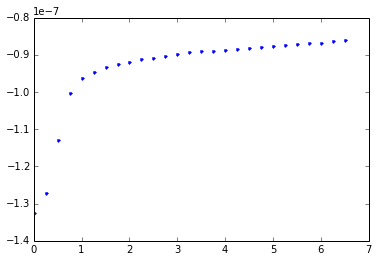

In [14]:
datos = sp.loadtxt('../lantz/mediciones/fg/defabrica8.txt')
plt.plot(datos[:,0], datos[:,1], '.')

La curva parece corrida. Desconecto el LOW del 220.

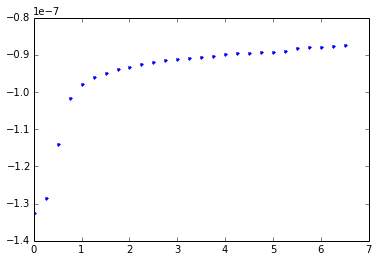

In [17]:
datos = sp.loadtxt('../lantz/mediciones/fg/defabrica11.txt')
plt.plot(datos[:,0], datos[:,1], '.')

Desconecto el sustrato (pata 8)

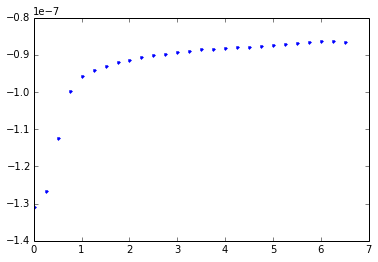

In [16]:
datos = sp.loadtxt('../lantz/mediciones/fg/defabrica10.txt')
plt.plot(datos[:,0], datos[:,1], '.')

**TODO**: preguntarle a Mariano/Adrián acerca de esta fuga.

Aplico un pulso de 3ms y -20nA

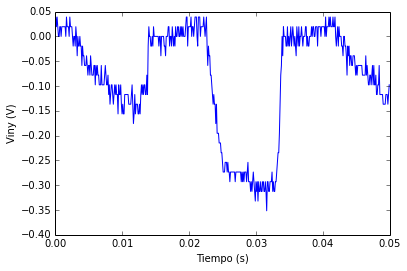

In [18]:
vinyeccion = sp.loadtxt('../lantz/mediciones/inyeccion/2015-10-14_14.44.39.txt')
plt.plot(vinyeccion[:,0], vinyeccion[:,1])
plt.xlabel('Tiempo (s)')
plt.ylabel('Viny (V)')

Tiene superpuesto mucho ruido de línea. Veo si cambió la IV.

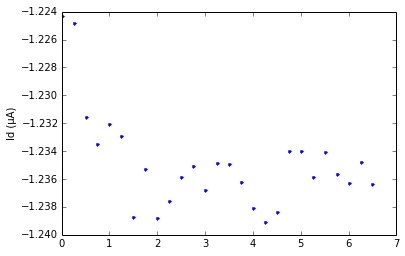

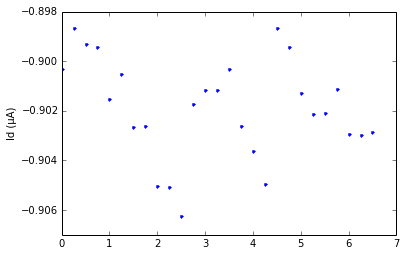

In [21]:
datos = sp.loadtxt('../lantz/mediciones/fg/inyeccion01_iv01.txt')
plt.plot(datos[:,0], datos[:,1]*1e6, '.')
plt.ylabel('Id (µA)')
plt.figure()
datos = sp.loadtxt('../lantz/mediciones/fg/inyeccion01_iv03.txt')
plt.plot(datos[:,0], datos[:,1]*1e6, '.')
plt.ylabel('Id (µA)')

Tengo que probar meterle pulsos a un capacitor y ver qué hace la guarda cuando apago Operate.

15 de Octubre
==

La guarda sigue activa con Operate apagado. Si hago una IV después de inyectar, sin desconectar nada, me queda el diodo (nwell lector)-sustrato en inversa. Para evitar fugas por ese diodo, puedo aislar el opamp de tierra.

Vengo inyectando mal: conecté el cocodrilo negro a sustrato pensando que era la guarda, pero es el shield.

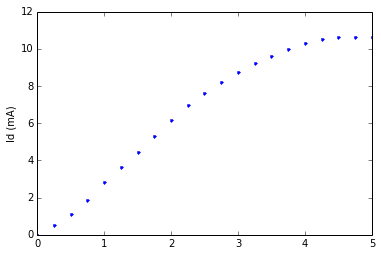

In [4]:
datos = sp.loadtxt('../lantz/mediciones/fg/muchas_inyecciones07.txt')
plt.plot(datos[:,0], datos[:,1]*1e3, '.')
plt.ylabel('Id (mA)')

14:47 prendí la lámpara UV, 15:04 apagué

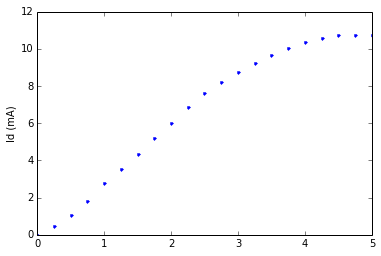

In [5]:
datos = sp.loadtxt('../lantz/mediciones/fg/primerborrado01.txt')
plt.plot(datos[:,0], datos[:,1]*1e3, '.')
plt.ylabel('Id (mA)')

Inyecto .1nC : 15:45:24

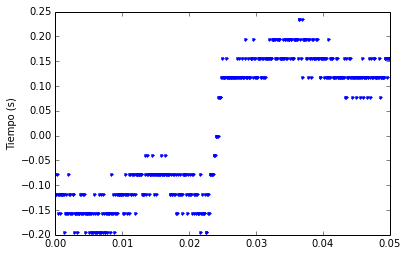

In [8]:
datos = sp.loadtxt('../lantz/mediciones/inyeccion/2015-10-15_15.45.24.txt')
plt.plot(datos[:,0], datos[:,1], '.')
plt.ylabel('Vg (V)')
plt.ylabel('Tiempo (s)')

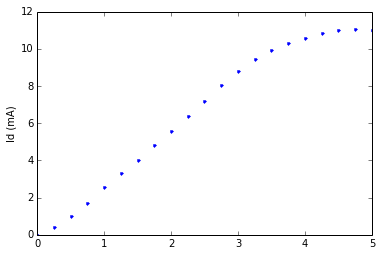

In [6]:
datos = sp.loadtxt('../lantz/mediciones/fg/borradoelectrico01.txt')
plt.plot(datos[:,0], datos[:,1]*1e3, '.')
plt.ylabel('Id (mA)')

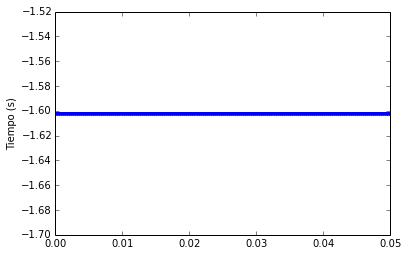

In [9]:
datos = sp.loadtxt('../lantz/mediciones/inyeccion/2015-10-15_15.47.29.txt')
plt.plot(datos[:,0], datos[:,1], '.')
plt.ylabel('Vg (V)')
plt.ylabel('Tiempo (s)')

No capturó bien esa inyección porque Viny se fue para -5V. Creo que al hacer la IV alguna conexión entre drain e inyector deja el inyector en -5V.

19 de Octubre
==

20 de Octubre
==

El 617 se vuelve loco con el autorange prendido al medir .001uA, salvo que desconecte la entrada.



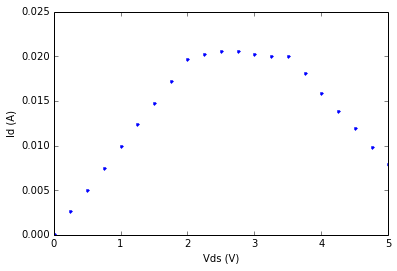

In [5]:
datos = sp.loadtxt('../lantz/mediciones/toqueteo00.txt')
plt.plot(datos[:,0], datos[:,1], '.')
plt.ylabel('Id (A)')
plt.xlabel('Vds (V)')

!? Es repetible

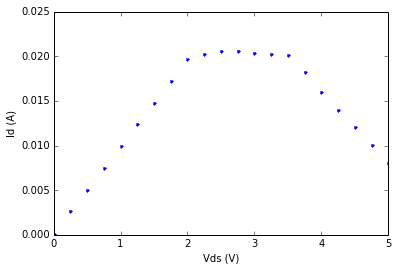

In [6]:
datos = sp.loadtxt('../lantz/mediciones/toqueteo01.txt')
plt.plot(datos[:,0], datos[:,1], '.')
plt.ylabel('Id (A)')
plt.xlabel('Vds (V)')

Desconecto osciloscopio

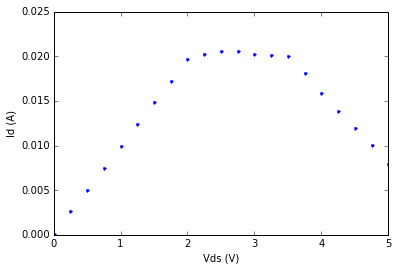

In [7]:
datos = sp.loadtxt('../lantz/mediciones/toqueteo03.txt')
plt.plot(datos[:,0], datos[:,1], '.')
plt.ylabel('Id (A)')
plt.xlabel('Vds (V)')

22 de Octubre
==

Saqué las cosas del APS del gabinete metálico para hacer lugar y simplificar las conexiones.

Sin haber inyectado, ahora las IVs dan pA. 

Metí dos pulsos de 3ms, -20nA y la IV sigue igual. Me puse a medir tensiones y ahí funcionó. Debe haber un cable suelto.

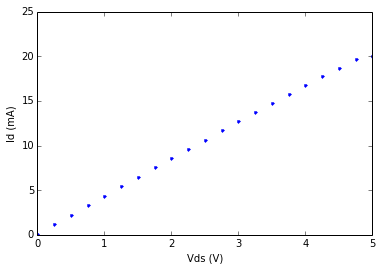

In [3]:
datos = sp.loadtxt('../lantz/mediciones/fg/caja_vaciada00.txt')
plt.plot(datos[:,0], datos[:,1]*1e3, '.')
plt.ylabel('Id (mA)')
plt.xlabel('Vds (V)')

Inyecto pulsos de 3ms, 20nA

(0, 1)

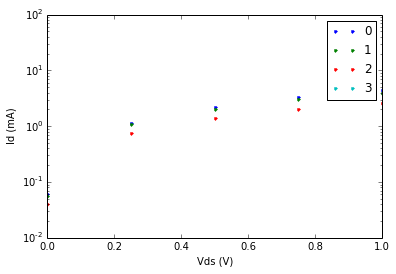

In [10]:
for ii in range(4):
    datos = sp.loadtxt('../lantz/mediciones/fg/caja_vaciada{:02d}.txt'.format(ii))
    plt.semilogy(datos[:,0], datos[:,1]*1e3, '.', label=str(ii))
plt.ylabel('Id (mA)')
plt.xlabel('Vds (V)')
plt.legend()
plt.xlim((0,1))

Al final se apagó. Inyecto pulsos de 3ms y -2nA.

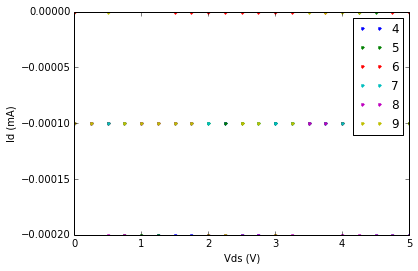

In [6]:
for ii in range(4, 10):
    datos = sp.loadtxt('../lantz/mediciones/fg/caja_vaciada{:02d}.txt'.format(ii))
    plt.plot(datos[:,0], datos[:,1]*1e3, '.', label=str(ii))
plt.ylabel('Id (mA)')
plt.xlabel('Vds (V)')
plt.legend()

No parece prenderse. Pruebo 3ms y -10nA

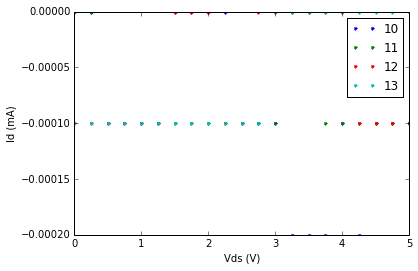

In [7]:
for ii in range(10, 14):
    datos = sp.loadtxt('../lantz/mediciones/fg/caja_vaciada{:02d}.txt'.format(ii))
    plt.plot(datos[:,0], datos[:,1]*1e3, '.', label=str(ii))
plt.ylabel('Id (mA)')
plt.xlabel('Vds (V)')
plt.legend()

Idem. Vuelvo a -20nA.

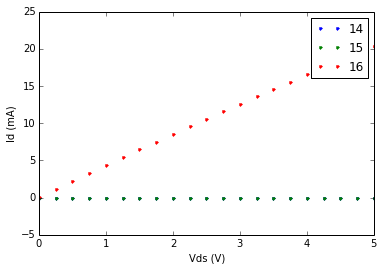

In [11]:
for ii in range(14, 17):
    datos = sp.loadtxt('../lantz/mediciones/fg/caja_vaciada{:02d}.txt'.format(ii))
    plt.plot(datos[:,0], datos[:,1]*1e3, '.', label=str(ii))
plt.ylabel('Id (mA)')
plt.xlabel('Vds (V)')
plt.legend()

Traté de ajustar los cables para que la IV ande de forma repetible. Descargo de a 20nA. No pasa nada.

Hay que medir en oscuridad, cerré la caja haciéndole una ranura para los cables.

26 de Octubre
==

Primera IV manual daba pA en todo el rango de Vds. Inyecto de a -20nA dos veces, sigue dando pA salvo cuando abrí para ver que funcione el seguidor (ahí pasó a 15mA como el otro día).

Aplico un par de pulsos de 200nA, dejando Vds=5V se ven algunos mA que van cayendo.

Metiendo 600nA llego a 17mA y de ahí cae. Pérdidas en el FG?

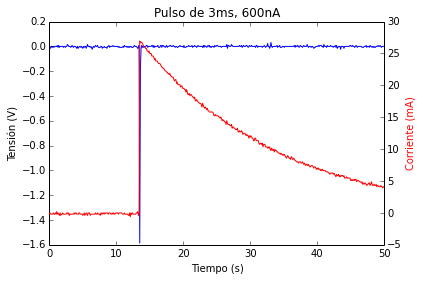

In [4]:
datos = sp.loadtxt('../lantz/mediciones/fg/inyeccion_y_corriente00.txt')
plt.plot(datos[:,0], datos[:,1], label='Inyector')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión (V)')
ax = plt.gca().twinx()
ax.plot(datos[:,0], datos[:,2]/2*20, 'r-', label='Id')
ax.set_ylabel('Corriente (mA)', color='r')
plt.title('Pulso de 3ms, 600nA')

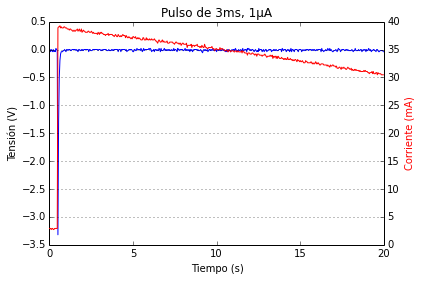

In [6]:
datos = sp.loadtxt('../lantz/mediciones/fg/inyeccion_y_corriente01.txt')
plt.plot(datos[:,0], datos[:,1], label='Inyector')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión (V)')
ax = plt.gca().twinx()
ax.plot(datos[:,0], datos[:,2]/2*20, 'r-', label='Id')
ax.set_ylabel('Corriente (mA)', color='r')
plt.title('Pulso de 3ms, 1µA')
plt.grid()

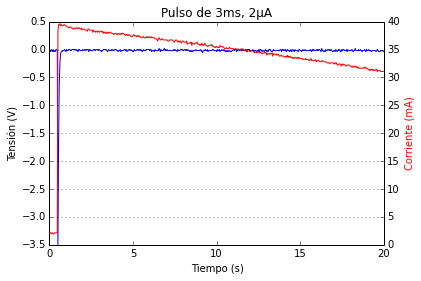

In [8]:
datos = sp.loadtxt('../lantz/mediciones/fg/inyeccion_y_corriente03.txt')
plt.plot(datos[:,0], datos[:,1], label='Inyector')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión (V)')
ax = plt.gca().twinx()
ax.plot(datos[:,0], datos[:,2]/2*20, 'r-', label='Id')
ax.set_ylabel('Corriente (mA)', color='r')
plt.title('Pulso de 3ms, 2µA')
plt.grid()

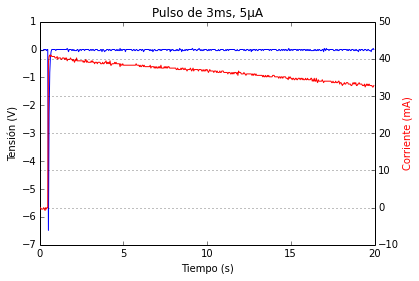

In [9]:
datos = sp.loadtxt('../lantz/mediciones/fg/inyeccion_y_corriente04.txt')
plt.plot(datos[:,0], datos[:,1], label='Inyector')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión (V)')
ax = plt.gca().twinx()
ax.plot(datos[:,0], datos[:,2]/2*20, 'r-', label='Id')
ax.set_ylabel('Corriente (mA)', color='r')
plt.title('Pulso de 3ms, 5µA')
plt.grid()

Voy a medir Id vs Viny con Vds=.1V como hace Tarr[1]

[1]N. G. Tarr, K. Shortt, Y. Wang, y I. Thomson, «A sensitive, temperature-compensated, zero-bias floating gate MOSFET dosimeter», IEEE Transactions on Nuclear Science, vol. 51, n.º 3, pp. 1277-1282, jun. 2004.

Aplicando -5.5V entre inyector y well, Id sube lentamente hasta estabilizarse en 3mA. En cuanto apago la tensión de inyector, Id va a 0. Probé hasta -23.5V y pasa lo mismo (las especificaciones del proceso dan como máximo -25V).

Si no es que el FG pierde, puede ser que no estoy inyectando y sólo se prende por acople capacitivo. Tanto Tarr como Thomsen [2] inyectan desde un segundo poly, y aplican ~ -30V.

[2]A. Thomsen y M. A. Brooke, «A floating-gate MOSFET with tunneling injector fabricated using a standard double-polysilicon CMOS process», IEEE Electron Device Letters, vol. 12, n.º 3, pp. 111-113, mar. 1991.


27 de Octubre
==

Adrián estima tensión de inyección 10V para los 125nm de óxido de gate.

Desconectamos la guarda y probamos aplicar corriente al inyector. Con corrientes negativas de -5nA a -80nA aplica -12V, cambiando muy poco la tensión con la corriente -> indica túnel. Con corrientes positivas de 5nA a 40nA aplica 10V, también cambiando poco la tensión. Mientras aplico corriente negativa Id=2.3mA, bajando muy lentamente, y cae rápido a 0 al sacar la tensión de inyección.

Poniendo la guarda veo lo mismo para corrientes negativas.

Dice Adrián que me limite a .1A/cm² por tiempos cortos.

* Area del nwell inyector: 125 um² -> para tensiones negativas, 125nA
* Area del canal inyector: 4.3 um² -> para tensiones positivas, 4.3 nA <- NO

La corriente debería subir a medida que la carga en el well del inyector hace túnel hacia el FG y descarga la capacidad del inyector.

Tanto para corrientes positivas como negativas, sólo inyecto a través del óxido de gate (el resto del well tiene óxido grueso) -> siempre limito a 125nA

29 de Octubre
==

Ahora sin la guarda no levanta tensión, poniéndola va a -12V como ayer. Esto es con la tapa levantada (puede que la luz haga más conductiva la juntura well-sustrato). Conectando la fuente de tensión del 617 al inyector tampoco levanta tensión, va a haber que desconectarla al inyectar.

Mido una curva de transferencia usando el inyector como control gate

Vds = 0.50 V	Vt = 1.24 V
Vds = 0.10 V	Vt = 1.23 V
Vds = 0.05 V	Vt = 1.22 V


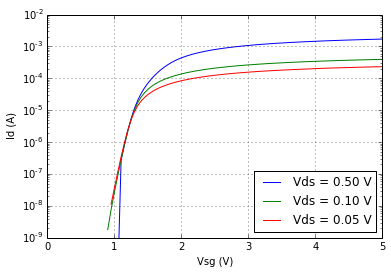

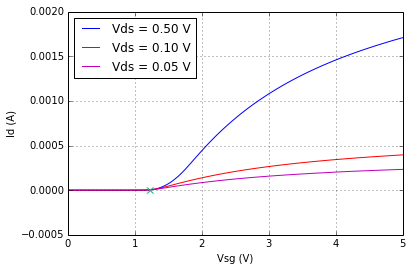

In [30]:
for indice, vds in zip([2,3,4], [.5, .1, .05]):
    datos = sp.loadtxt('../lantz/mediciones/fg/controlgate{:02d}.txt'.format(indice))
    plt.semilogy(-datos[:,0], datos[:,1], label='Vds = {:.2f} V'.format(vds))
plt.xlabel('Vsg (V)')
plt.ylabel('Id (A)')
plt.ylim((1e-9, 1e-2))
plt.grid()
plt.legend(loc='lower right')
plt.figure()
for indice, vds in zip([2,3,4], [.5, .1, .05]):
    datos = sp.loadtxt('../lantz/mediciones/fg/controlgate{:02d}.txt'.format(indice))
    plt.plot(-datos[:,0], datos[:,1], label='Vds = {:.2f} V'.format(vds))
    dV = datos[0,0]-datos[1,0]
    gm = sp.diff(datos[:,1])/dV
    indice_gmmax = sp.argmax(gm)
    gmmax = gm[indice_gmmax]
    vt = -datos[indice_gmmax,0]-datos[indice_gmmax,1]/gmmax - vds / 2
    print('Vds = {:.2f} V\tVt = {:.2f} V'.format(vds, vt))
    plt.plot(vt, 0, 'x')
plt.xlabel('Vsg (V)')
plt.ylabel('Id (A)')
plt.grid()
plt.legend(loc='upper left')

Para la curva con Vds = 0.1 V tuve que sacar la autoescala del 617 porque se volvía loco (display parpadea, no responde a la PC). Idem con la de .05V. Me pregunto si no entra en un ciclo porque al cambiar de escala cambia el burden voltage y afecta la corriente.

04 V	Vt = 1.22 V
05 V	Vt = 1.56 V


(-1e-05, 5e-05)

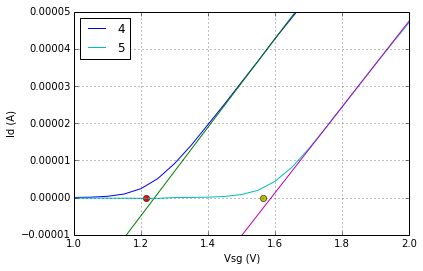

In [38]:
vds = .05
for indice in [4,5]:
    datos = sp.loadtxt('../lantz/mediciones/fg/controlgate{:02d}.txt'.format(indice))
    plt.plot(-datos[:,0], datos[:,1], label=str(indice))
    dV = datos[0,0]-datos[1,0]
    gm = sp.diff(datos[:,1])/dV
    indice_gmmax = sp.argmax(gm)
    gmmax = gm[indice_gmmax]
    vt = -datos[indice_gmmax,0]-datos[indice_gmmax,1]/gmmax - vds / 2
    plt.plot(-datos[:,0], sp.polyval([gmmax, 0], -datos[:,0]-vt-vds/2))
    print('{:02d} V\tVt = {:.2f} V'.format(indice, vt))
    plt.plot(vt, 0, 'o')
plt.xlabel('Vsg (V)')
plt.ylabel('Id (A)')
plt.grid()
plt.legend(loc='upper left')
plt.xlim((1,2))
plt.ylim((-10e-6,50e-6))

Se corrió para el lado equivocado: esperaba que el FG se cargue negativamente y así el lector se prenda con menor Vsg. No controlé el tiempo de inyección, fueron -10nA durante algunos minutos. Ahora aplico -20nA durante 3 minutos.

04 V	Vt = 1.22 V
05 V	Vt = 1.56 V
07 V	Vt = 1.65 V
08 V	Vt = 1.70 V
11 V	Vt = 1.73 V
12 V	Vt = 1.71 V


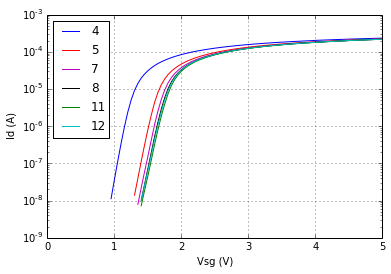

In [49]:
vds = .05
for indice in [4,5, 7, 8, 11, 12]:
    datos = sp.loadtxt('../lantz/mediciones/fg/controlgate{:02d}.txt'.format(indice))
    plt.semilogy(-datos[:,0], datos[:,1], label=str(indice))
    dV = datos[0,0]-datos[1,0]
    gm = sp.diff(datos[:,1])/dV
    indice_gmmax = sp.argmax(gm)
    gmmax = gm[indice_gmmax]
    vt = -datos[indice_gmmax,0]-datos[indice_gmmax,1]/gmmax - vds / 2
    #plt.plot(-datos[:,0], sp.polyval([gmmax, 0], -datos[:,0]-vt-vds/2))
    print('{:02d}\tVt = {:.2f} V'.format(indice, vt))
    plt.plot(vt, 0, 'o')
plt.xlabel('Vsg (V)')
plt.ylabel('Id (A)')
plt.grid()
plt.legend(loc='upper left')
#plt.xlim((1,2))
#plt.ylim((-10e-6,50e-6))

Entre 11 y 12 no inyecté, quería ver si se mantiene estable el Vt.

IVs de inyector
==

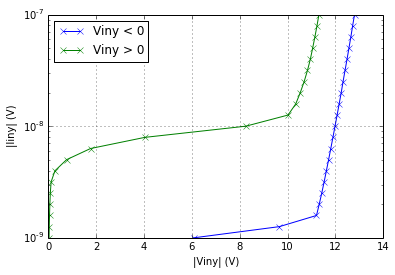

In [59]:
datos = sp.loadtxt('../lantz/mediciones/fg/vi_inyeccion00.txt')
plt.semilogy(-datos[:,1], -datos[:,0], 'x-', label='Viny < 0')
datos = sp.loadtxt('../lantz/mediciones/fg/vi_inyeccion02.txt')
plt.semilogy(datos[:,1], datos[:,0], 'x-', label='Viny > 0')
plt.legend(loc='upper left')
plt.xlabel('|Viny| (V)')
plt.ylabel('|Iiny| (V)')
plt.grid()

Esperamos que la curva negativa esté del _otro_ lado de la positiva, porque en la positiva el inyector estaría en inversión entonces caería mayor tensión. Salvo que el inyector esté pinchado y estemos inyectando a través del lector, lo cual también explicaría el signo equivocado del corrimiento.

Mido IVs de inyección en el otro die (sin gota de resina), esta vez sin guarda para ambos signos (así son comparables)

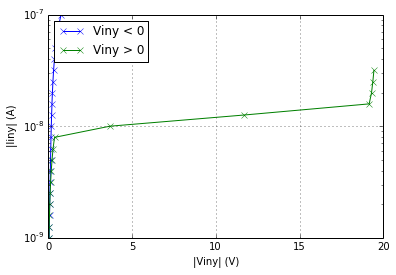

In [3]:
datos = sp.loadtxt('../lantz/mediciones/fg/vi_inyeccion04.txt')
plt.semilogy(-datos[:,1], -datos[:,0], 'x-', label='Viny < 0')
datos = sp.loadtxt('../lantz/mediciones/fg/vi_inyeccion03.txt')
plt.semilogy(datos[:,1], datos[:,0], 'x-', label='Viny > 0')
plt.legend(loc='upper left')
plt.xlabel('|Viny| (V)')
plt.ylabel('|Iiny| (A)')
plt.grid()

3 de noviembre
==

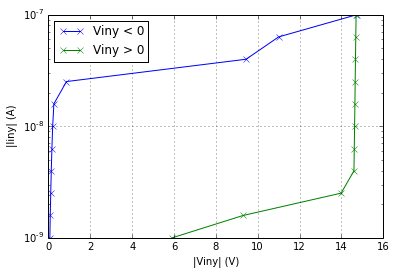

In [5]:
datos = sp.loadtxt('../lantz/mediciones/fg/vi_inyeccion05.txt')
plt.semilogy(-datos[:,1], -datos[:,0], 'x-', label='Viny < 0')
datos = sp.loadtxt('../lantz/mediciones/fg/vi_inyeccion06.txt')
plt.semilogy(datos[:,1], datos[:,0], 'x-', label='Viny > 0')
plt.legend(loc='upper left')
plt.xlabel('|Viny| (V)')
plt.ylabel('|Iiny| (A)')
plt.grid()

Quizás se va al límite porque ahora sí está inyectando a través del óxido del inyector. Pruebo inyectar pulsos cortos.

Metí pulsos de -10 nA hasta -120 nA de 3 ms y luego de -120 nA desde 3 ms hasta 20 ms, la tensión del inyector nuncá bajó más de 1-2V.

Con pulsos positivos actúa como capacitor, la tensión sube linealmente hasta el límite del 220. 

Con 50 nA la pendiente es 9.84 V / 40 ms -> 203 pF. Ctotal del FG debería ser 112 pF.

Vengo haciendo cagadas, la corriente para 0.1 A/cm² es 4nA.

Hice una IV de 0 a -5 V, no prende. Quizás está cargado muy positivamente.

Polaricé drain-source mientras inyectaba negativo (-1.5 nA, se topó contra -15 V) y medí Id = .3 mA. Al apagar la corriente de inyector siguió prendido.

Con pulsos cortos (300 ms) de 1.5 nA logré apagarlo, pero después no sirvieron para prenderlo al cambiar la polaridad. Para eso tuve que dejar andando un rato 

Dice Adrián que cargue y descargue monitoreando Id y Viny, y mida Id vs Vds entre cargas.

5 de Noviembre
==

Curvas de carga/descarga

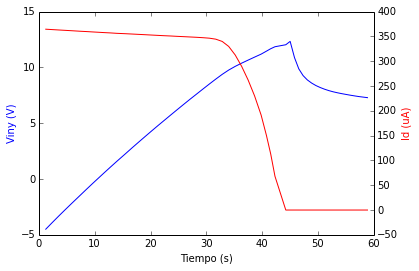

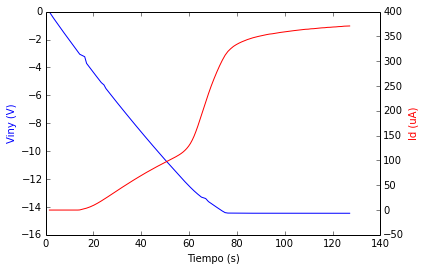

In [5]:
graficar_carga('../lantz/mediciones/fg/carga01.txt')
graficar_carga('../lantz/mediciones/fg/carga02.txt')

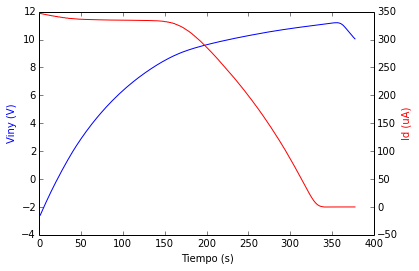

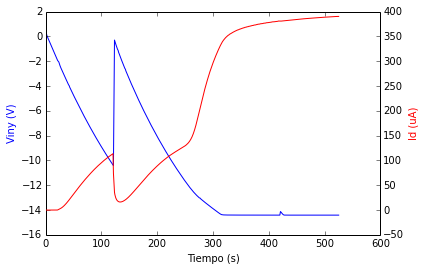

In [7]:
graficar_carga('../lantz/mediciones/fg/carga03.txt')
graficar_carga('../lantz/mediciones/fg/carga04.txt')

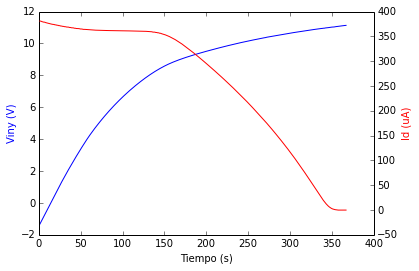

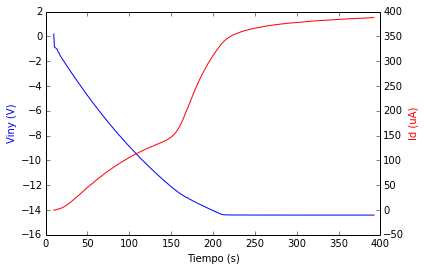

In [9]:
graficar_carga('../lantz/mediciones/fg/carga05.txt')
graficar_carga('../lantz/mediciones/fg/carga06.txt')

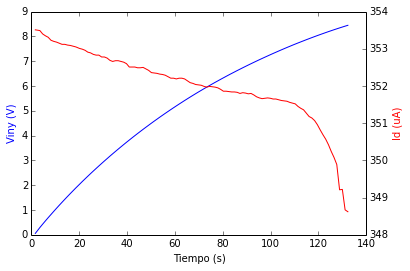

In [4]:
graficar_carga('../lantz/mediciones/fg/carga08.txt')

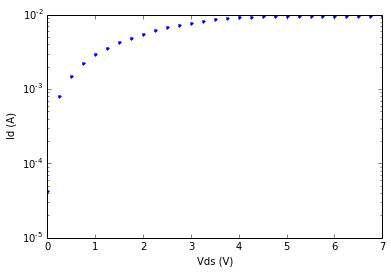

In [8]:
graficar_iv('../lantz/mediciones/fg/carga08_iv.txt')

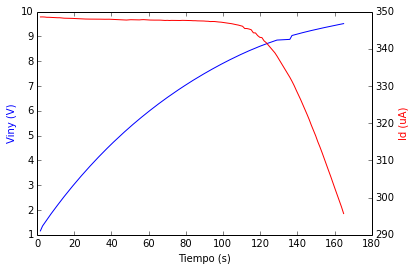

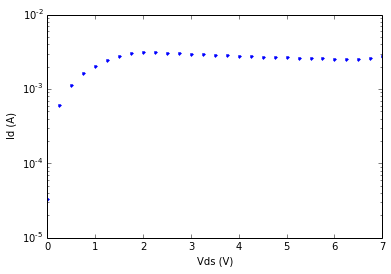

In [9]:
graficar_carga('../lantz/mediciones/fg/carga09.txt')
graficar_iv('../lantz/mediciones/fg/carga09_iv.txt')

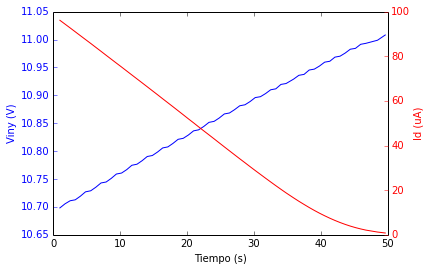

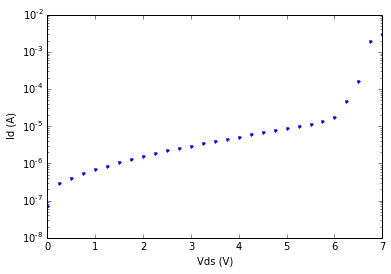

In [17]:
graficar_carga('../lantz/mediciones/fg/carga10.txt')
graficar_iv('../lantz/mediciones/fg/carga10_iv.txt')

6 de Noviembre
==

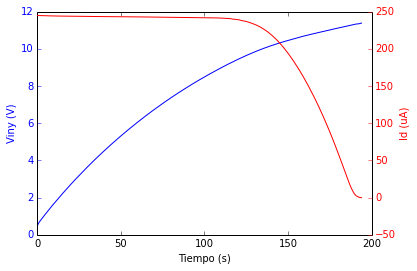

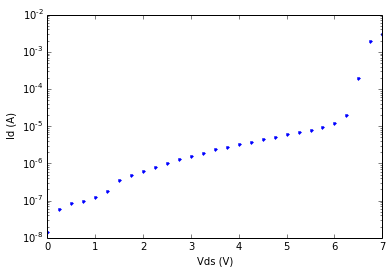

In [24]:
graficar_carga('../lantz/mediciones/fg/carga11.txt')
graficar_iv('../lantz/mediciones/fg/carga11_iv.txt')

Voy a evitar Vds > 5 V.

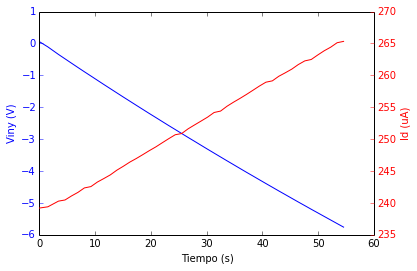

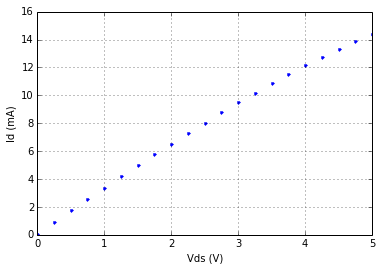

In [31]:
graficar_carga('../lantz/mediciones/fg/carga12.txt')
graficar_iv('../lantz/mediciones/fg/carga12_iv.txt')

La curva de carga anterior terminaba con el MOS apagado, ahora arranca en 240 uA?

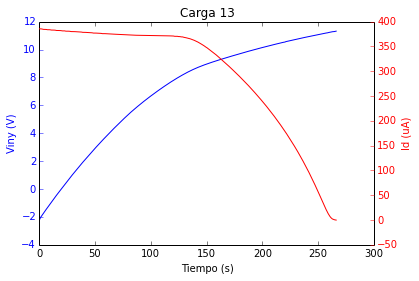

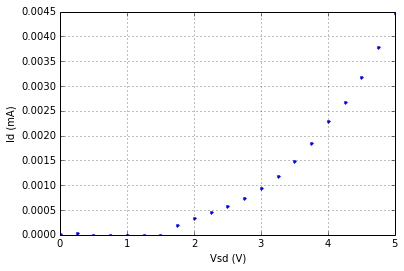

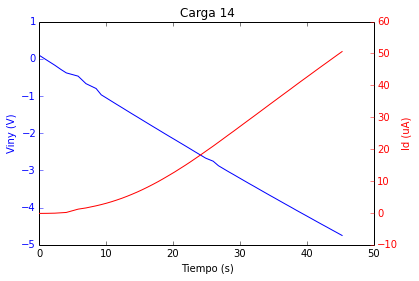

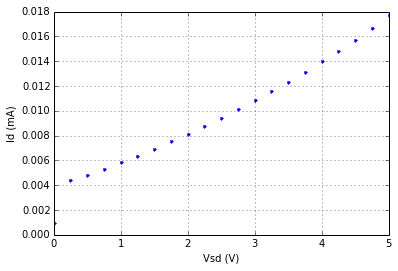

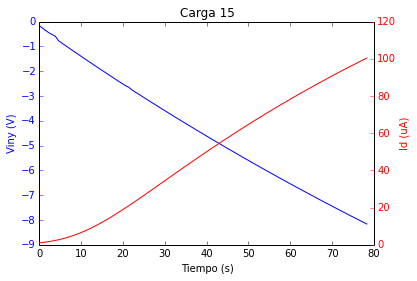

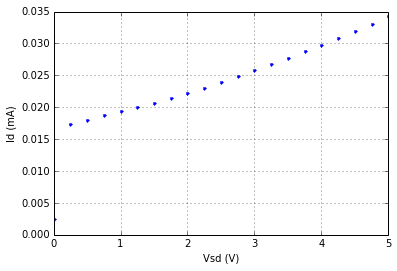

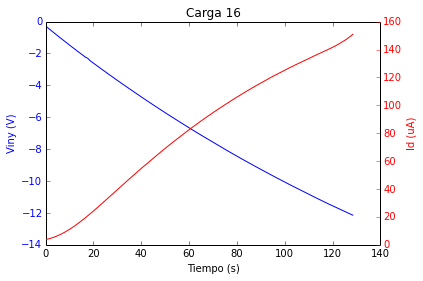

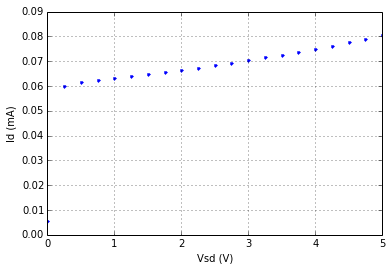

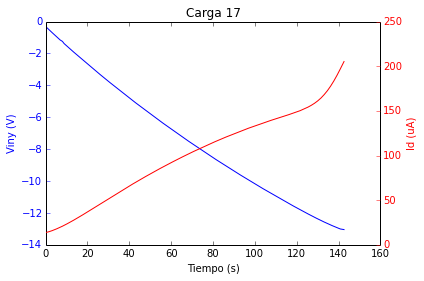

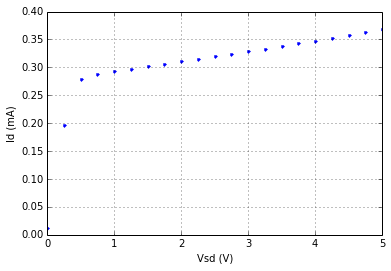

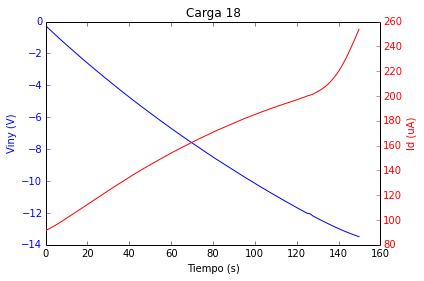

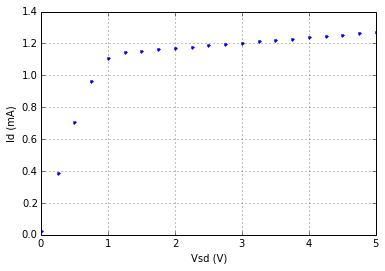

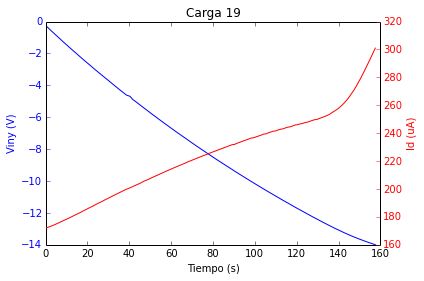

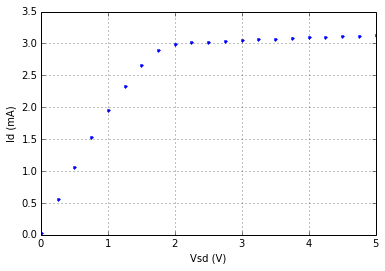

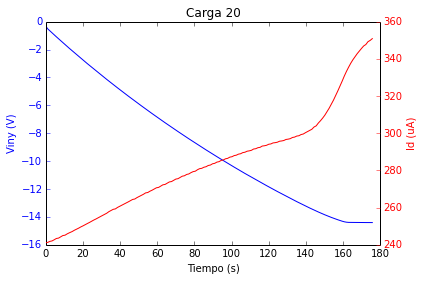

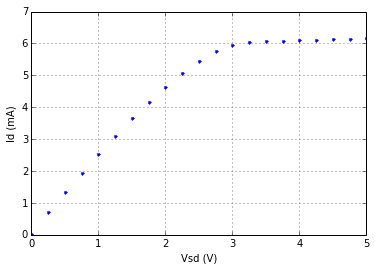

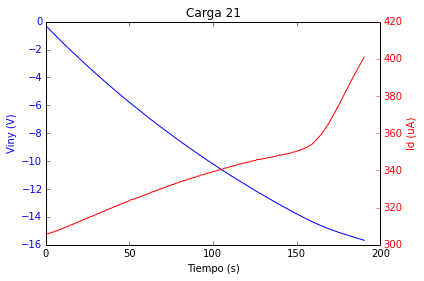

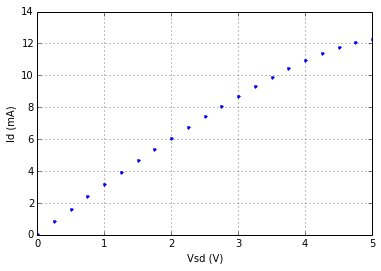

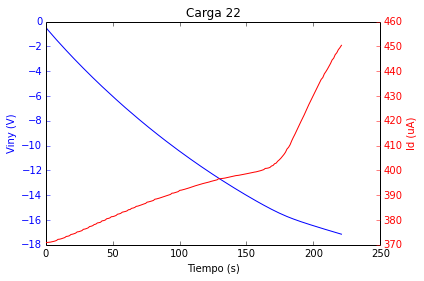

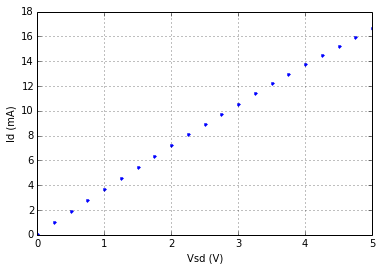

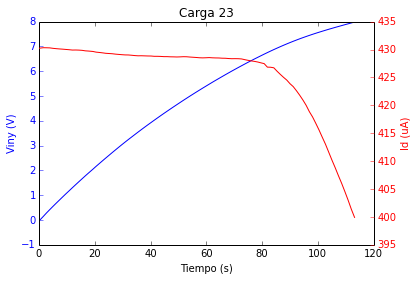

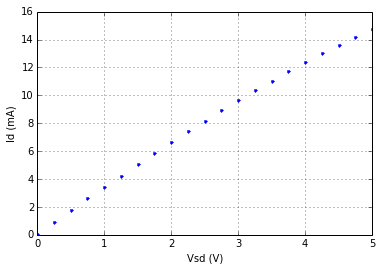

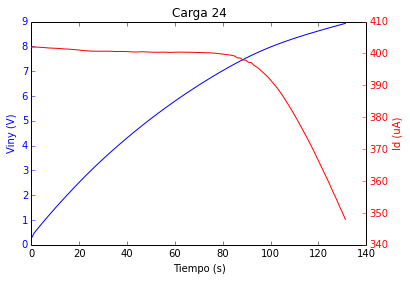

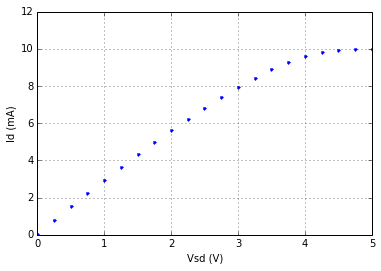

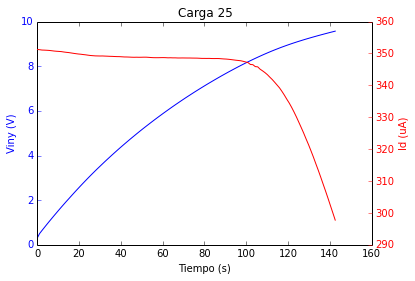

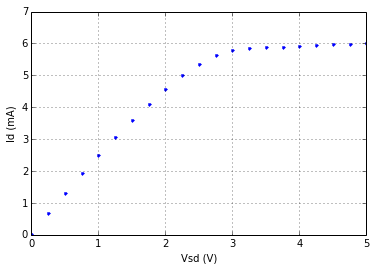

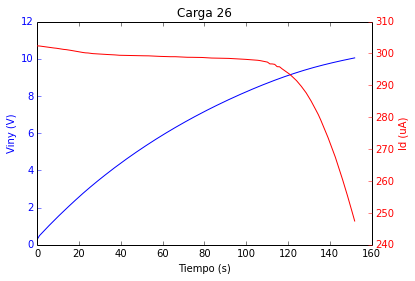

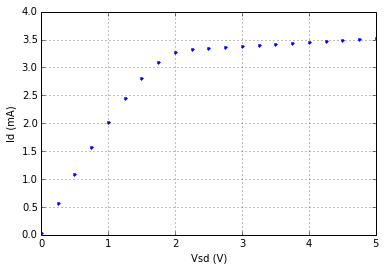

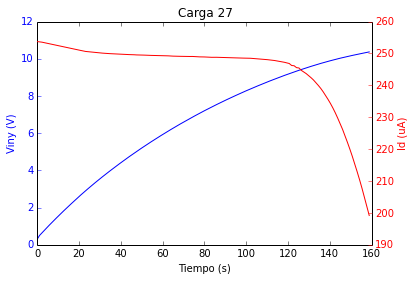

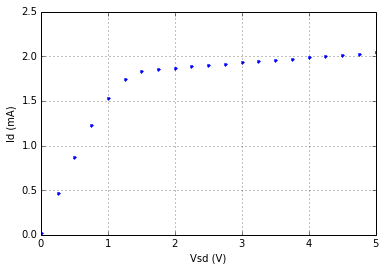

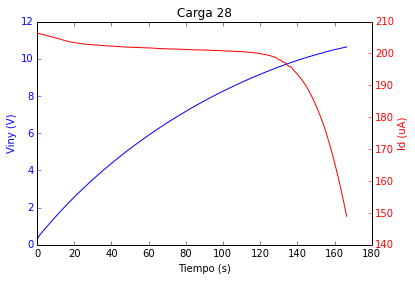

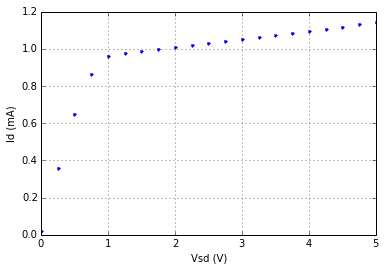

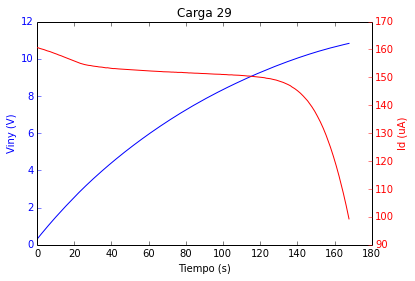

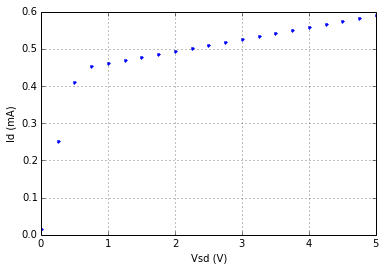

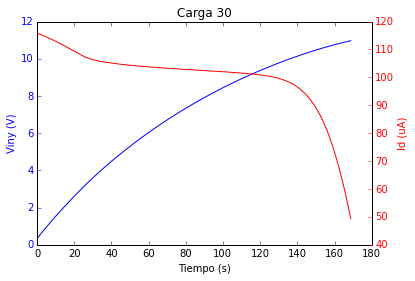

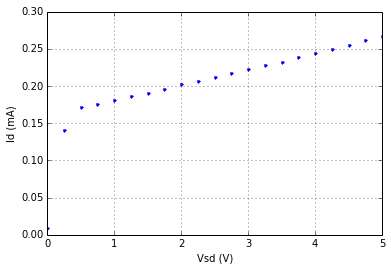

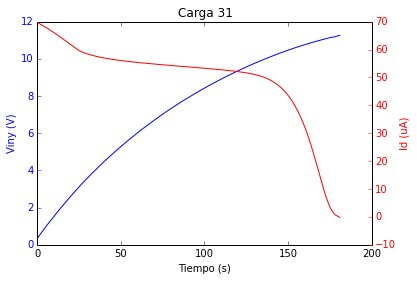

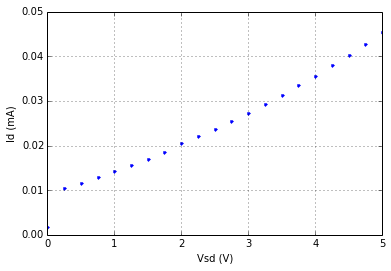

In [55]:
for ii in range(13, 32):
    graficar_carga('../lantz/mediciones/fg/carga{:02d}.txt'.format(ii))
    plt.title('Carga {}'.format(ii))
    graficar_iv('../lantz/mediciones/fg/carga{:02d}_iv.txt'.format(ii))

Al prenderlo retiene mal la carga. Al apagarlo solapan bastante bien.

Apagando
--

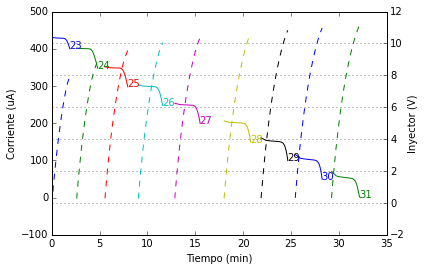

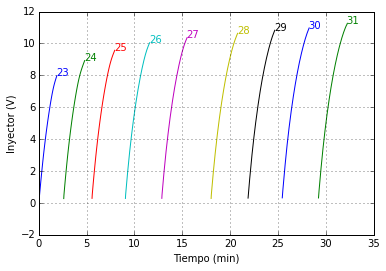

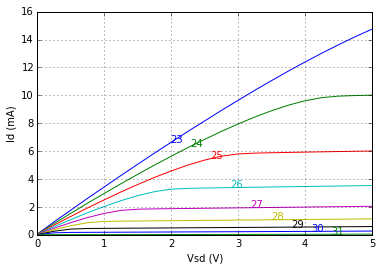

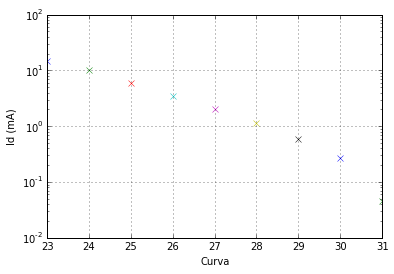

In [10]:
graficar_varias(23, 32)

Prendiendo
--

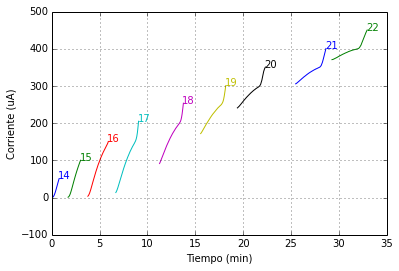

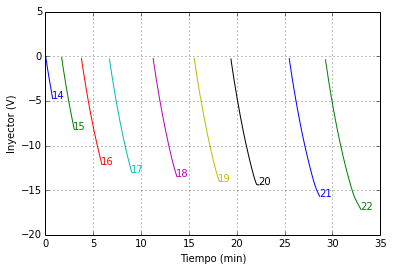

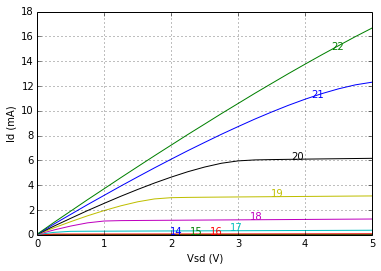

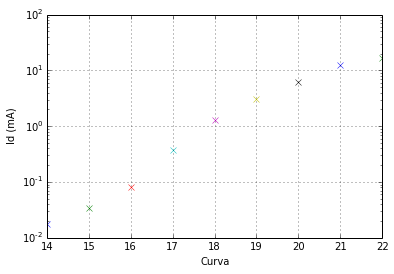

In [9]:
graficar_varias(14, 23)

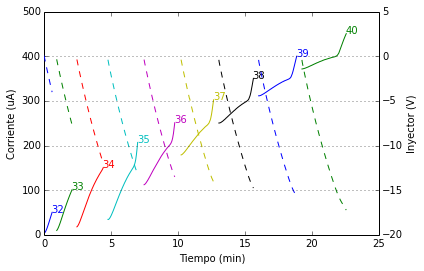

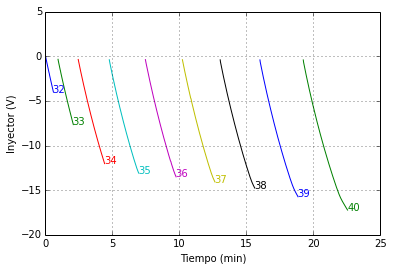

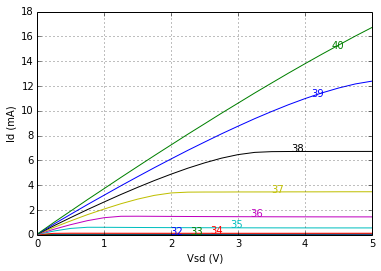

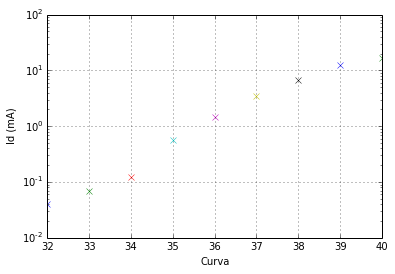

In [11]:
graficar_varias(32, 41)

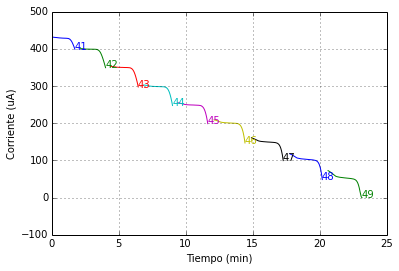

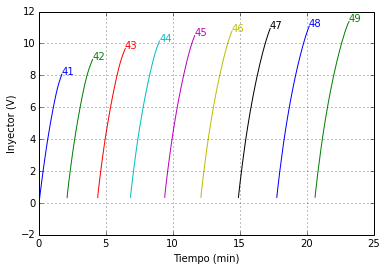

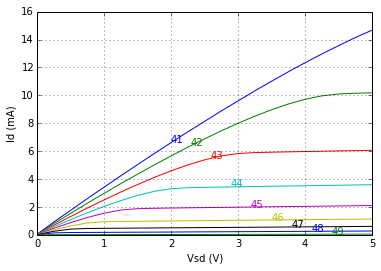

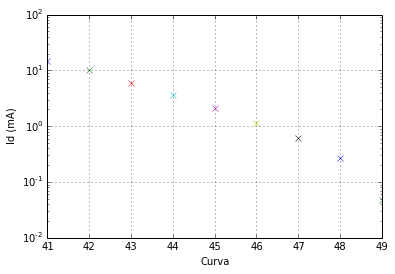

In [8]:
graficar_varias(41, 50)

Probé prenderlo sin la guarda pero el inyector no baja de -1.4 V. Quizás es que la juntura sustrato-well del lector es enorme y conduce toda esa corriente en inversa con apenas -1.4 V. El problema es que la guarda crea una malla en paralelo con el canal del lector, entonces no estoy midiendo la corriente de drain al inyectar. Tendría que flotar el 617 que mide corriente y conectarlo directamente al drain.

Problemas flotando el 617 porque le creí a las etiquetas de un triaxial que están mal. Código de colores de triaxial:

* Rojo -> Central
* Negro -> Guarda
* Verde -> Shield

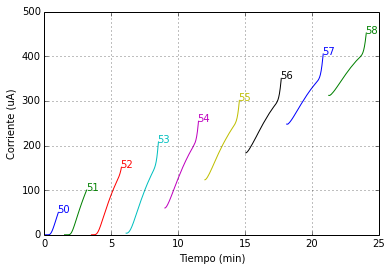

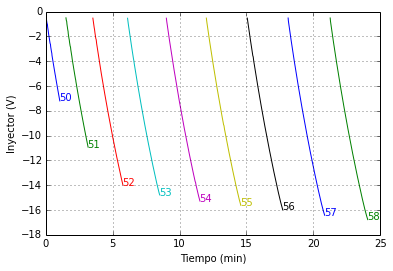

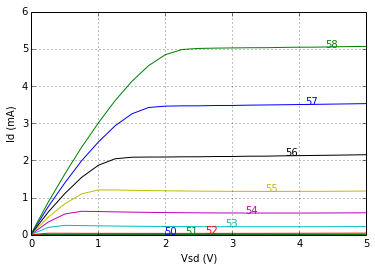

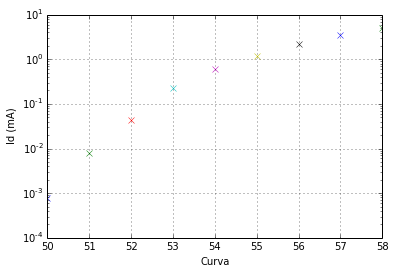

In [7]:
graficar_varias(50,59)

9 de Noviembre
==

Comparo última IV del viernes con la primera de hoy

01	../lantz/mediciones/fg/carga58_iv.txt
02	../lantz/mediciones/fg/carga58_iv_lunes.txt
03	../lantz/mediciones/fg/carga58_iv_lunes2.txt


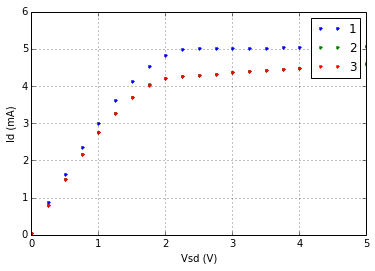

In [8]:
graficar_ivs(['../lantz/mediciones/fg/carga58_iv.txt',
              '../lantz/mediciones/fg/carga58_iv_lunes.txt'])

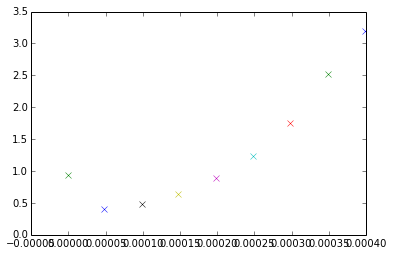

In [19]:
for ii, narchivo in enumerate(range(41, 50)):
    carga = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}.txt'.format(narchivo))
    iv = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}_iv.txt'.format(narchivo))
    i2 = iv[-1,1]
    i1 = iv[1,1]
    vov = 2*i2*.1/i1
    plt.plot(carga[-1,2], vov, 'x')

11 de Noviembre
==

Necesito armar un cable de 16 m para medir el FG. 16 m * 92 mΩ/m = 1.47 Ω

1.47 Ω * .3 mA = .6 mV

Llegué y el FG estaba apagado. Agregué una opción a inyeccion.py para que no lleve el inyector a 0 V sino que deje un rato monitoreando. Me descuidé un minuto y se fue a Id = .6 mA mientras estaba colgado esperando que destrabe el 617. Cancelé e Id empezó a caer hasta los pA.

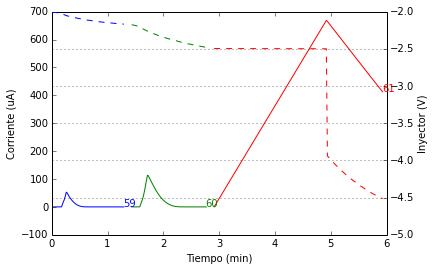

In [7]:
graficar_cargas(59, 62)

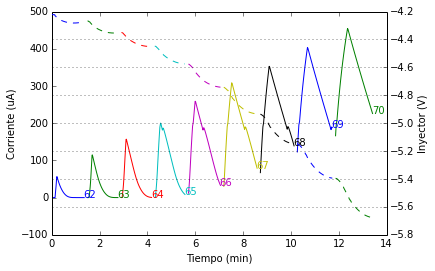

In [9]:
graficar_cargas(62, 71)

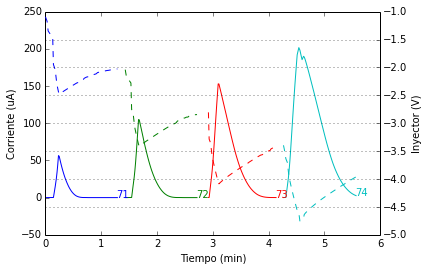

In [10]:
graficar_cargas(71, 75)

Id parece seguir dViny/dt

0.0309621621622
-0.138464864865


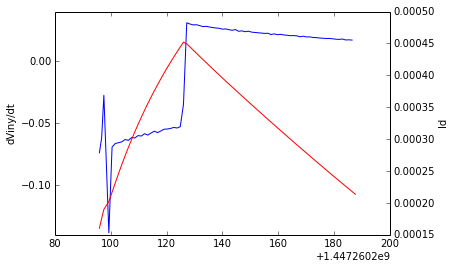

In [21]:
datos = sp.loadtxt('../lantz/mediciones/fg/carga79.txt')
dvdt = sp.diff(datos[:,1])/sp.diff(datos[:,0])
plt.plot(datos[:-1,0], dvdt)
plt.ylabel('dViny/dt')
ax = plt.gca().twinx()
ax.plot(datos[:,0], datos[:,2], 'r')
ax.set_ylabel('Id')

print(max(dvdt))
print(min(dvdt))

Pero esa relación corriente/pendiente da una capacidad demasiado grande:

In [15]:
200e-6 / min(dvdt)

-0.001444409743910057

Pruebo inyectar igual que ayer, llevando inyector a 0:

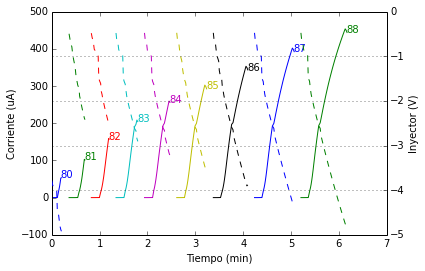

In [27]:
graficar_cargas(80,89)

Llevé el inyector a mano a -5 V. Al apagar la inyección se estabilizó en -2.6 V mientras caía la corriente. Luego dejó de moverse la tensión de inyección, pero siguió cayendo la corriente.

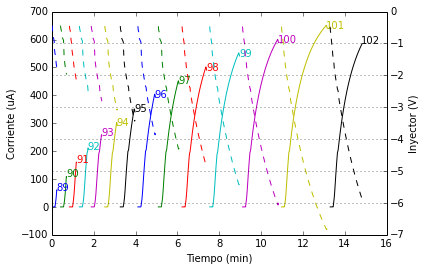

In [29]:
graficar_cargas(89, 103)

El cable triaxial de la fuente de corriente tenía roto el conductor central (negro), así que no había retorno para lo que inyectaba.

12 de Noviembre
==

Mido IVs de los diodos inyector-sustrato y well lector-sustrato. Limito en 20 V como dicen las especificaciones del proceso.

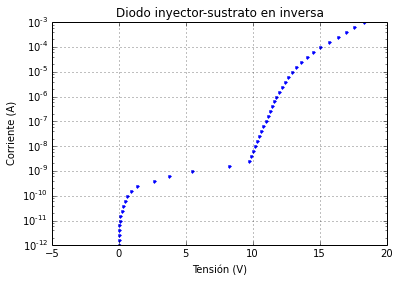

In [8]:
graficar_vi('../lantz/mediciones/fg/vi_inyector00.txt', titulo='Diodo inyector-sustrato en inversa')

Dice Adrián que en 10V empezó a hacer túnel por el óxido del lector.

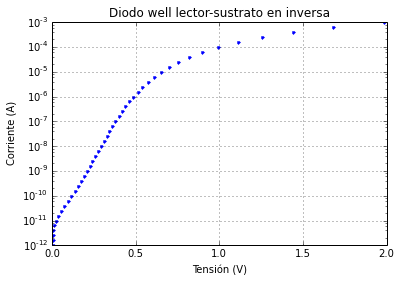

In [7]:
graficar_vi('../lantz/mediciones/fg/vi_lector00.txt', titulo='Diodo well lector-sustrato en inversa')

Me parece demasiado alta esa corriente en inversa, aunque la guarda del 220 se banca hasta 100 mA.

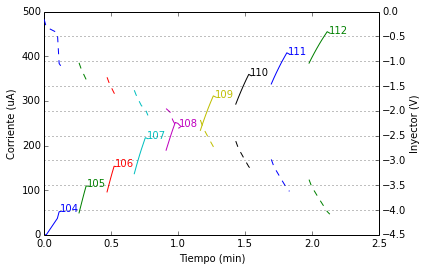

In [8]:
graficar_cargas(104, 113)

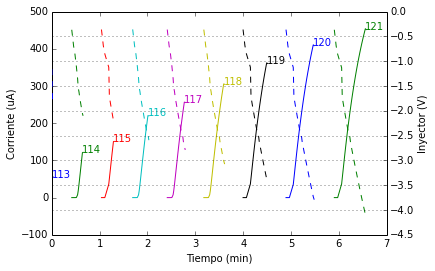

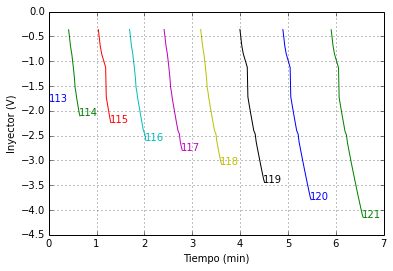

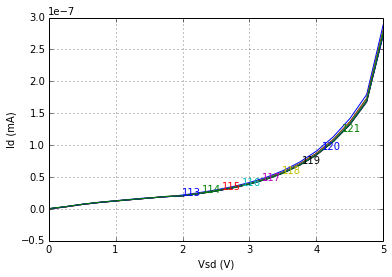

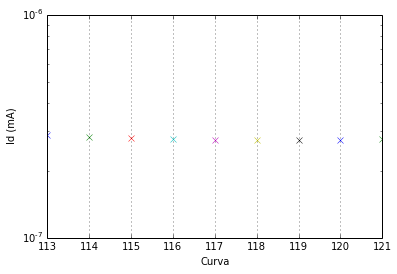

In [9]:
graficar_varias(113, 122)

Ahora que arreglé el común del 220 da consistente con un inyector pinchado. Mido una IV entre inyector y well del lector para tener una buena idea de corriente de túnel.

(1e-12, 2e-07)

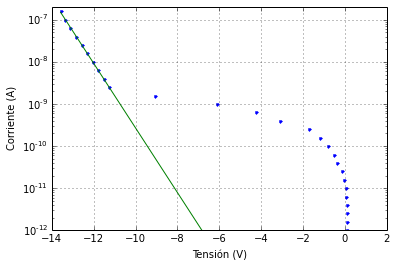

In [21]:
graficar_vi('../lantz/mediciones/fg/vi_inyeccion08.txt')
datos = sp.loadtxt('../lantz/mediciones/fg/vi_inyeccion08.txt')
log_corriente = sp.log(-datos[-10:,0])
ajuste = sp.polyfit(-datos[-10:,1], log_corriente, 1)
plt.semilogy(datos[:,1], sp.exp(sp.polyval(ajuste, -datos[:,1])))
plt.ylim((1e-12, 2e-7))

El well del lector tiene 1900 um de perimetro y 2e5 um² de area, según las especificaciones daría una corriente en inversa de ~ 200 fA.

19 de Noviembre
==

Especificaciones del diodo nwell-sustrato con 5 V en inversa:
    
* Area leakage 1e-18 A/um²
* Sidewall leakage 1e-17 A/um

Esto me da 

* Inyector: 1e-18 \* 125 + 1e-17 \* 45 = .58 fA (medí 1 nA)
* Lector: 1e-18 \* 223967 + 1e-17 \* 1921 = .24 pA (medí mucho más)

La corriente que medí del inyector corresponde a una pérdida de 5 GΩ, es razonable.

Guardo el die 7, paso al que tiene un empaquetado DIP lindo.

Pinout DIP
--

* 8, 10: NC -> guarda
* 9: Inyector
* 11: LectorP
* 12: LectorN
* 15: Sustrato

IV inicial: mido pA con Vds = 1 V. Pruebo inyectar.

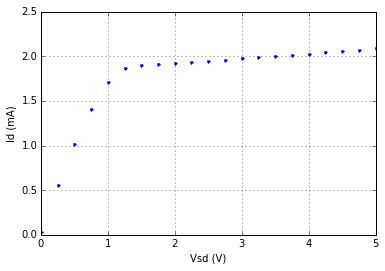

In [9]:
graficar_iv('../lantz/mediciones/fg/iv_dip_00.txt')

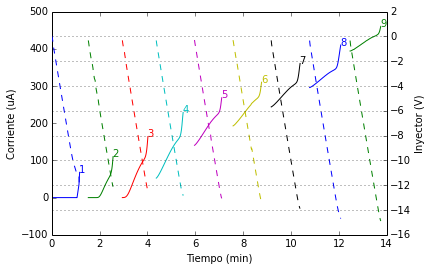

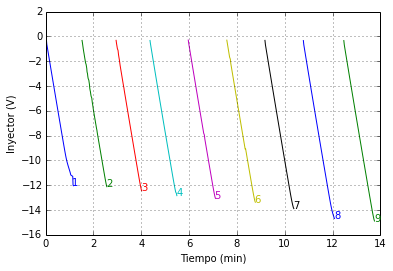

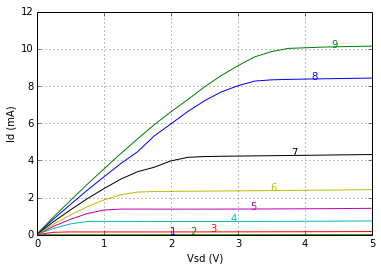

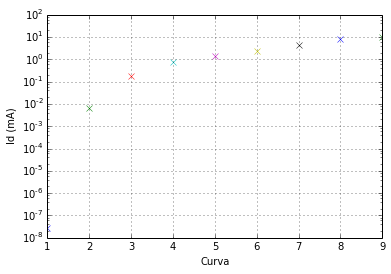

In [15]:
graficar_varias(1, 10, '_dip_')

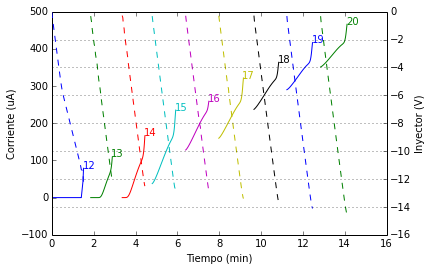

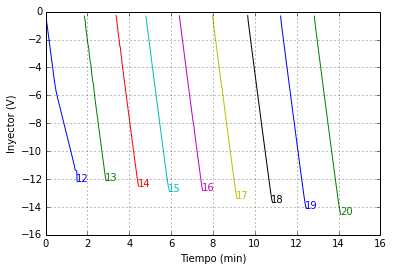

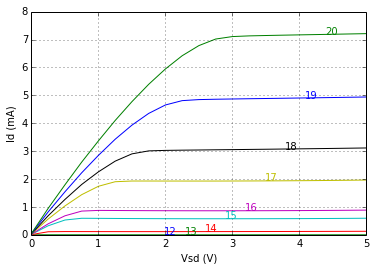

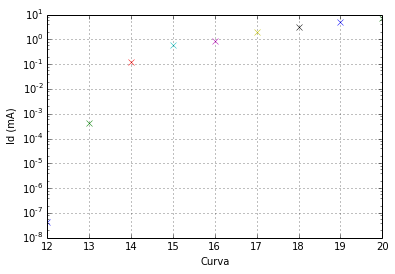

In [19]:
graficar_varias(12, 21, '_dip_')

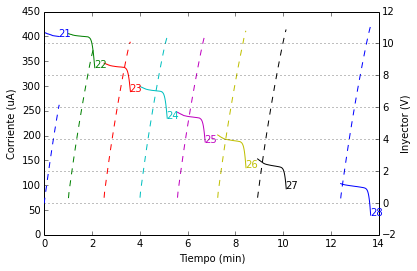

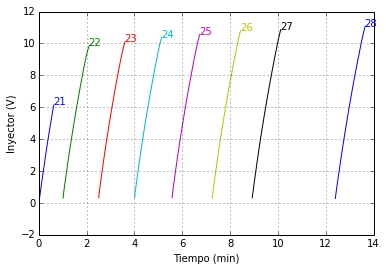

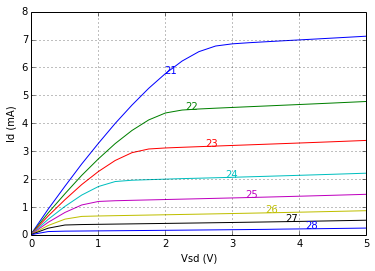

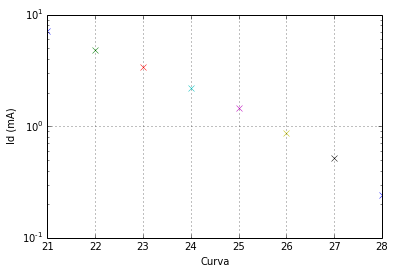

In [21]:
graficar_varias(21, 29, '_dip_')

Lo dejé cargado a Id = 468 uA @ Vds = 0.1 V. Mañana veo cuánta carga queda.

20 de Noviembre
==

Medí Id = 563 uA @ Vds = 0.1 V

24 de Noviembre
==

Uso del irradiador
--

* Luz verde = Tapa bien cerrada
* Luz roja = irradiando


1. Llevarlo a la posición segura con ON/OFF
2. Verificar la posición midiendo con el contador
3. Abrir, llevando tapa hacia la izquierda para no llevarse puesto la lengüeta del interruptor

25 de Noviembre
==

Dejé midiendo el FG durante la noche

In [8]:
corriente = sp.loadtxt('../lantz/mediciones/quickDAQData/noche3_puntos.tsv', skiprows=12, )[:,0] / 10e3
tiempo = sp.arange(len(corriente))
delta_corriente = (corriente[-1]-corriente[0])
delta_tiempo = tiempo[-1] - tiempo[0]
tasa_dosis = 5e-2 / 60 # Gy/s
sensibilidad = -delta_corriente / (delta_tiempo * tasa_dosis) # A/Gy
sensibilidad

6.4181562399451617e-06

Filtro y decimo la señal para quedarme con 50 puntos

In [9]:
cociente = int(len(corriente) / 100); cociente
factor_filtro = 1
filtro = sp.signal.firwin(factor_filtro*cociente, 1./cociente)
#plt.plot(filtro)
#plt.figure()
#plt.loglog(abs(sp.fft(filtro))[:factor_filtro*cociente/2])
corriente_filtrada = sp.convolve(corriente, filtro)
#plt.loglog(abs(sp.fft(corriente))[:len(corriente)/2])
#plt.loglog(abs(sp.fft(corriente_filtrada))[:len(corriente_filtrada)/2])
corriente_filtrada2 = corriente_filtrada[::cociente][factor_filtro:-factor_filtro]
#plt.plot(tiempo[::cociente][:len(corriente_filtrada2)-1]/3600, sp.diff(corriente_filtrada2) / cociente * 1e9, '.')
#plt.xlabel('Tiempo (h)')
#plt.ylabel('d/dt Corriente (nA/s)')
len(corriente_filtrada2)
len(tiempo[::cociente])

101

0.0863283332784


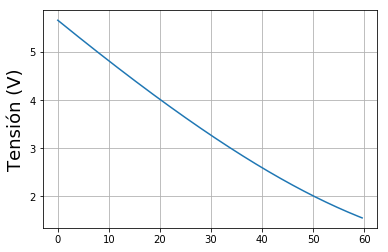

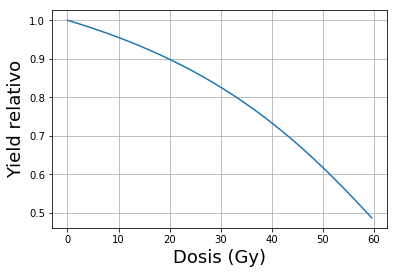

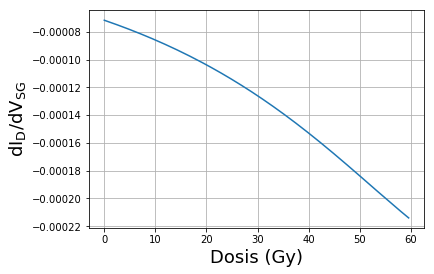

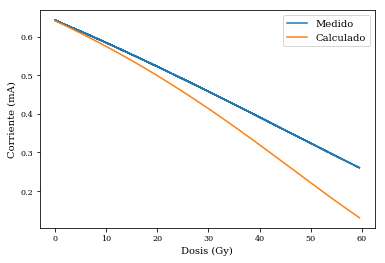

In [12]:

dosis = tasa_dosis * tiempo
vsg, idrain = sp.loadtxt('../../micro0/vsg_id.txt', unpack=True, usecols=(0,1))
didrain_dvsg = sp.diff(idrain) / sp.diff(vsg)
vsg2 = .5 * (vsg[1:] + vsg[:-1])
tension0 = sp.interp(corriente_filtrada2[0], -idrain, vsg)
sensibilidad0_corriente = sp.diff(corriente_filtrada2[:2])[0] / cociente / tasa_dosis # A/Gy
sensibilidad0_tension = sensibilidad0_corriente / sp.interp(tension0, vsg2, didrain_dvsg)
print(sensibilidad0_tension)
tox = 12.5e-7 # cm
def yield_relativo(tension):
    #E0 = 0.55e6
    #exponente = -0.7
    E0 = 1.35e6
    exponente = -0.9
    potencial_superficial = 0.7
    return (
        (1. + E0 * tox / (tension - potencial_superficial)) / (
             1. + E0 * tox / 
        (tension0 - potencial_superficial)))**exponente
def dvdt(tension, t0):
    return -sensibilidad0_tension * yield_relativo(tension
                                                  ) * tasa_dosis
# Sensibilidad basada en RADFET: 46e-3 V/Gy
tension = sp.integrate.odeint(dvdt, tension0, tiempo)[:,0]
#tension = tension0 - dosis * sensibilidad0_tension
plt.plot(dosis, tension)
plt.ylabel('Tensión (V)')
plt.figure()
plt.plot(dosis, yield_relativo(tension))
plt.xlabel('Dosis (Gy)')
plt.ylabel('Yield relativo')
plt.figure()
plt.plot(dosis, sp.interp(tension, vsg2, didrain_dvsg))
plt.xlabel('Dosis (Gy)')
plt.ylabel('dI$_D$/dV$_{SG}$')
plt.figure()
corriente_calc = -sp.interp(tension, vsg, idrain)
dcorriente_calc_ddosis = sp.diff(corriente_calc) / sp.diff(dosis) * 1e6
with plt.rc_context(fname='../../matplotlib.printrc'):
    plt.plot(dosis, corriente * 1e3, label='Medido')
    plt.plot(dosis, corriente_calc * 1e3, label='Calculado')
    plt.xlabel('Dosis (Gy)')
    plt.ylabel('Corriente (mA)')
    plt.legend()
    #plt.savefig('figuras/fg/irradiacion_corriente.pdf')

/home/ignamv/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


101

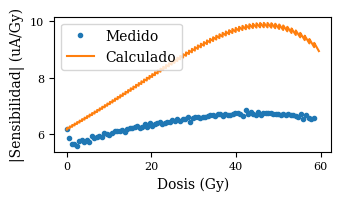

In [17]:
dosis2 = tiempo[::cociente][:len(corriente_filtrada2)-1]*tasa_dosis
#didv = -sp.diff(idrain)/sp.diff(vsg)
#idrain = -.5 * (idrain[1:] + idrain[:-1])
with plt.rc_context(fname='../../matplotlib.printrc'):
    plt.plot(dosis2, -sp.diff(corriente_filtrada2) / cociente / tasa_dosis * 1e6, '.', label='Medido')
    # dI/dD = dV/dD * dI/dV
    #sensibilidad_calculada = -46e-3 * 8.59 * corriente_filtrada2 * 1e6
    plt.plot(dosis[:-1], -dcorriente_calc_ddosis, '-', label='Calculado')
    plt.xlabel('Dosis (Gy)')
    plt.ylabel('|Sensibilidad| (uA/Gy)')
    plt.legend(loc='upper left')
    plt.savefig('figuras/fg/irradiacion_sensibilidad.pdf')
len(corriente_filtrada2)
len(tiempo[::cociente])

In [8]:
sp.savetxt('medido.txt', sp.column_stack((dosis2,
    sp.diff(corriente_filtrada2) / cociente / tasa_dosis * 1e6)), 
    header='Dosis (Gy)\tSensibilidad (uA/Gy)')
sp.savetxt('calculado.txt', sp.column_stack((dosis[:-1], dcorriente_calc_ddosis)), 
    header='Dosis (Gy)\tSensibilidad (uA/Gy)')

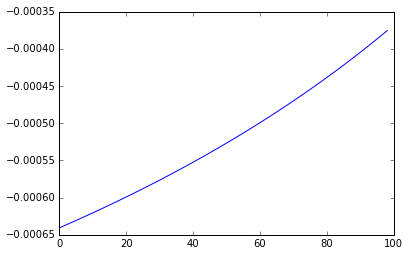

In [33]:
plt.plot(corriente_calc)

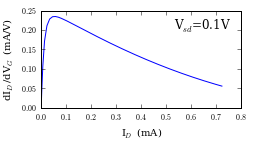

In [57]:
vsg, idrain = sp.loadtxt('../micro0/vsg_id.txt', unpack=True, usecols=(0,1))
didv = -sp.diff(idrain) / sp.diff(vsg)
idrain = -.5 * (idrain[1:] + idrain[:-1])
with plt.rc_context(fname='../matplotlib.printrc'):
    plt.plot(idrain * 1e3, didv * 1e3)
    plt.xlabel('I$_D$ (mA)')
    plt.ylabel('dI$_D$/dV$_G$ (mA/V)')
    plt.text(.53, .2, 'V$_{sd}$=0.1V')
    plt.savefig('figuras/fg/didv.pdf')

Resolución del conversor AD
--

In [18]:
20 / 2**16  / 10e3 # A

3.0517578125e-08

Ruido
--

In [19]:
dCorriente = sp.diff(corriente)
media = sp.mean(dCorriente)
std = sp.std(dCorriente)
dCorriente_normalizado = sp.sort((dCorriente - media)/std)

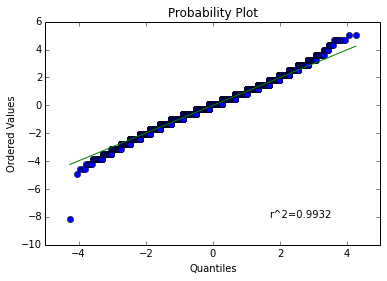

In [22]:
sp.stats.probplot(dCorriente_normalizado, plot=plt)
plt.show()

In [36]:
ruido = 400e-9
ruido / sensibilidad

-0.06233609071820792

In [38]:
tasa_dosis * delta_tiempo

58.880000000000017

* filtrado
* ruido -> Nacho
      -> rato de oscuridad a diferentes corrientes
* aumento Vd -> mayor sensibilidad
* medir en oscuridad


In [4]:
corriente = sp.loadtxt('../lantz/mediciones/quickDAQData/noche3_puntos.tsv', skiprows=12, )[:,0] / 10e3
dcorriente = sp.diff(corriente) / sp.sqrt(10)
with plt.rc_context(fname='../matplotlib.printrc'):
    plt.hist(dcorriente * 1e6, bins=20)
    std = sp.std(dcorriente)
    plt.xlim((-.4,.4))
    plt.xlabel('$\\Delta$ Corriente (uA)')
    plt.ylabel('Frecuencia') 
    plt.text(0, 22000, '$\sigma$ = {:.0f}nA$\leftrightarrow${:.0f}mGy'.format(std*1e9, std/sensibilidad*1e3), fontsize=10)
    #plt.title('Ruido en FG')
    plt.savefig('figuras/fg/ruido.pdf')

26 de Noviembre
==

Dejé midiendo en oscuridad toda la noche

In [24]:
corriente = sp.loadtxt('../lantz/mediciones/fg/oscuridad.tsv', skiprows=12) / 10e3
tiempo = sp.arange(len(corriente)) / 20

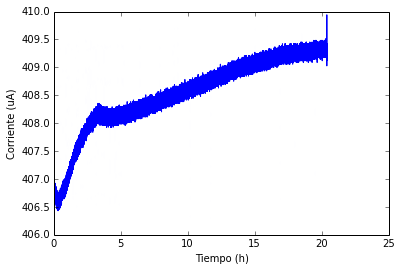

In [26]:
plt.plot(tiempo / 3600,datos * 1e6)
plt.xlabel('Tiempo (h)')
plt.ylabel('Corriente (uA)')

6.1115163265875685e-08

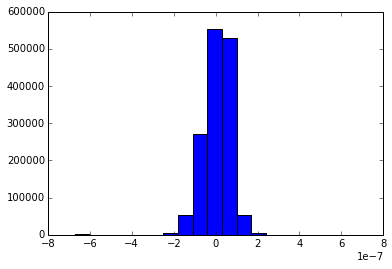

In [28]:
dCorriente = sp.diff(datos)
plt.hist(dCorriente, bins=20)
sp.std(dCorriente)

Oscuridad con Vds = 5 V
--

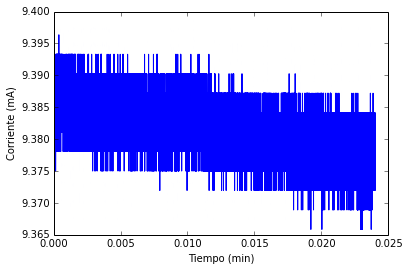

In [30]:
corriente = sp.loadtxt('../lantz/mediciones/fg/oscuridad5V_recortado.tsv', skiprows=12) / 100
dCorriente = sp.diff(corriente)
tiempo = sp.arange(len(corriente)) / 50000
plt.plot(tiempo / 60, corriente * 1e3)
plt.xlabel('Tiempo (min)')
plt.ylabel('Corriente (mA)')

3.9648381520916524e-06

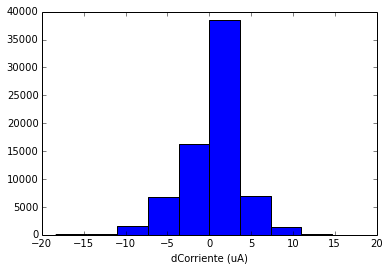

In [35]:
plt.hist(dCorriente * 1e6)
plt.xlabel('dCorriente (uA)')
sp.std(dCorriente)

In [33]:
cuentas = dict()
for c in corriente:
    try:
        cuentas[c] += 1
    except:
        cuentas[c] = 1

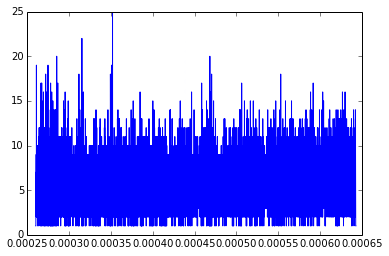

In [34]:
xx = sp.array(list(cuentas.items()))
orden = sp.argsort(xx[:,0])
xx = xx[orden,:]
plt.plot(xx[:,0], xx[:,1])

In [35]:
sp.diff(xx[:,0])

array([  3.05175781e-08,   3.05175781e-08,   3.05175781e-08, ...,
         3.05175781e-08,   3.05175781e-08,   1.52587891e-07])

15 de Diciembre
==


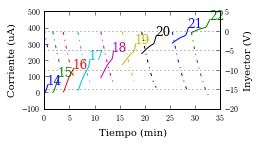

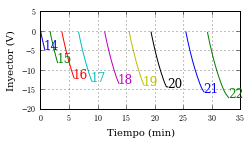

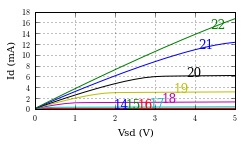

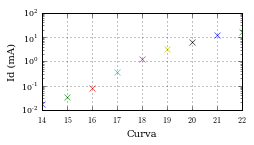

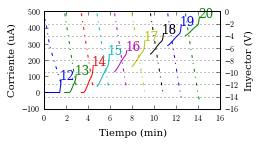

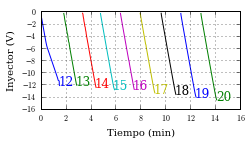

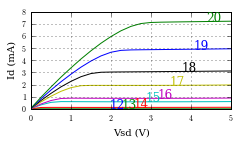

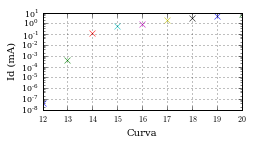

In [36]:
def graficar_cargas_guardar(primera, ultima, archivo, descripcion='_'):
    plt.figure()
    ax = plt.axes([.155,.2,.7,.625])
    t0 = None
    ax = None
    for ii in range(primera, ultima):
        carga = None
        try:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}.txt'.format(descripcion, ii))
        except FileNotFoundError:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}.txt'.format(ii))
        if t0 is None:
            t0 = carga[0, 0]
        line, = plt.plot((carga[:,0]-t0)/60, carga[:, 2] * 1e6)
        plt.text((carga[-1,0]-t0)/60, carga[-1, 2] * 1e6, str(ii), color=line.get_color())
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Corriente (uA)')
    ax = plt.gca().twinx()
    for ii in range(primera, ultima):
        try:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}.txt'.format(descripcion, ii))
        except FileNotFoundError:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}.txt'.format(ii))
        ax.plot((carga[:,0]-t0)/60, carga[:, 1], '-.')
    ax.set_ylabel('Inyector (V)')
    plt.grid()
    plt.savefig(archivo + 'inyector.pdf')
def graficar_varias_guardar(primera, ultima, archivo, descripcion='_'):
    graficar_cargas_guardar(primera, ultima, archivo, descripcion)
    plt.figure()
    t0 = None
    for ii in range(primera, ultima):
        carga = None
        try:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}.txt'.format(descripcion, ii))
        except FileNotFoundError:
            carga = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}.txt'.format( ii))
        if t0 is None:
            t0 = carga[0, 0]
        line, = plt.plot((carga[:,0]-t0)/60, carga[:, 1])
        plt.text((carga[-1,0]-t0)/60, carga[-1, 1], str(ii), color=line.get_color())
    plt.xlabel('Tiempo (min)')
    plt.ylabel('Inyector (V)')
    plt.grid()
    plt.figure()
    for ii in range(primera, ultima):
        id = None
        try:
            iv = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}_iv.txt'.format(descripcion, ii))
        except FileNotFoundError:
            iv = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}_iv.txt'.format(ii))
        line, = plt.plot(iv[:,0], iv[:,1] * 1e3, label=str(ii))
        xx = 2 +  .3 * (ii - primera)
        yy = sp.interp(xx, iv[:,0], iv[:,1] * 1e3)
        plt.text(xx, yy, str(ii), color=line.get_color())
    plt.xlabel('Vsd (V)')
    plt.ylabel('Id (mA)')
    plt.grid()
    plt.savefig(archivo + 'iv.pdf')
    plt.figure()
    for ii in range(primera, ultima):
        iv = None
        try:
            iv = sp.loadtxt('../lantz/mediciones/fg/carga{}{:03d}_iv.txt'.format(descripcion, ii))
        except FileNotFoundError:
            iv = sp.loadtxt('../lantz/mediciones/fg/carga{:02d}_iv.txt'.format(ii))
        line, = plt.semilogy(ii, iv[-1,1] * 1e3, 'x', label=str(ii))
    plt.xlabel('Curva')
    plt.ylabel('Id (mA)')
    plt.grid()

with plt.rc_context(fname='../matplotlib.printrc'):
    graficar_varias_guardar(14, 23, 'figuras/fg/14a23_')
    graficar_varias_guardar(12, 21, 'figuras/fg/12a21dip_', '_dip_')

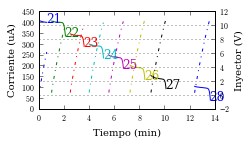

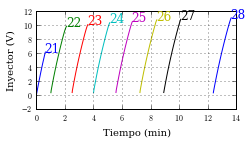

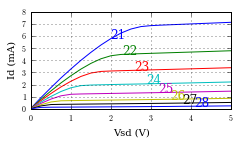

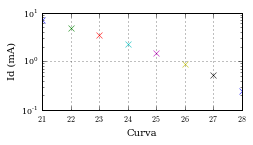

In [37]:

with plt.rc_context(fname='../matplotlib.printrc'):
    graficar_varias_guardar(21, 29, 'figuras/fg/21a29dip_', '_dip_')

## Calcular error mediante la desviación estándar de series de 10 muestras

2.3353206969599012e-08

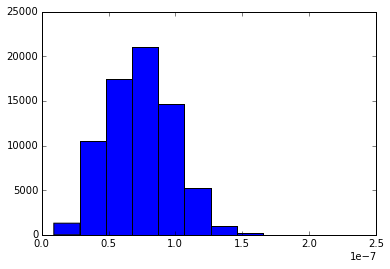

In [42]:
muestras_promedio = 10
desviaciones = sp.empty(len(corriente) - muestras_promedio + 1)
for ii in range(0, len(desviaciones)):
    desviaciones[ii] = sp.std(corriente[ii:ii+muestras_promedio])
plt.hist(desviaciones)
sp.mean(desviaciones) / sp.sqrt(muestras_promedio)

In [43]:
2.3 * sp.sqrt(10/2)

5.1429563482495162

In [1]:
180000 / 4.32

41666.666666666664

In [2]:
35000 / 4.32

8101.851851851851

# Revisión ruido

In [20]:
import numpy as np
datos = np.loadtxt('../lantz/mediciones/quickDAQData/noche3_puntos.tsv', skiprows=12, )

In [22]:
!head ../lantz/mediciones/quickDAQData/noche3_puntos.tsv